In [170]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import time
import numpy as np
import pandas as pd

In [171]:
df=pd.read_csv('first.csv')

In [172]:
df.columns
feature_names = df.columns
feature_names = feature_names[:41]
print(feature_names)

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31',
       'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41'],
      dtype='object')


<AxesSubplot:>

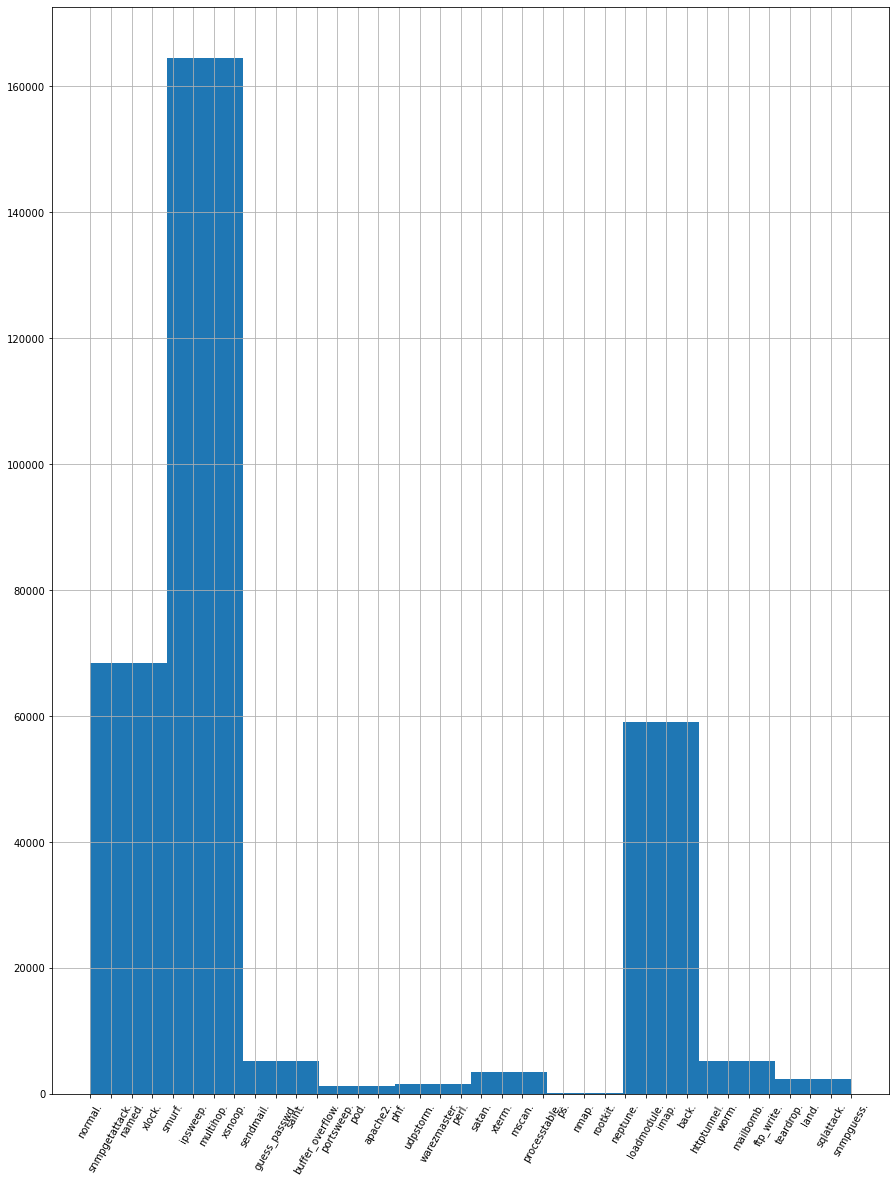

In [173]:
fig = plt.figure(figsize = (15,20))
plt.xticks(rotation = 60)
ax = fig.gca()
df['C42'].hist()

In [174]:
print(df['C42'].unique())



['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']


In [175]:
df=df[(df['C42']=='normal.') | (df['C42']=='smurf.') | (df['C42']=='snmpgetattack.') | (df['C42']=='udpstorm.') | (df['C42']=='neptune.')]
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


<AxesSubplot:>

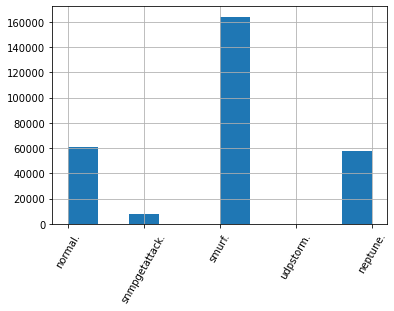

In [176]:
plt.xticks(rotation = 60)
df['C42'].hist()


In [177]:
16000/(16000+6000)
#results if the model does not train and guesses majority case

0.7272727272727273

In [178]:
data=df.values
data.shape

(290428, 42)

In [179]:
data[:,0]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [180]:
#encoding data to be numerical values
le=[None]*42
for i in range(42):
    print(i,end=' | ')
    le[i] = LabelEncoder()
    le[i].fit(data[:,i])
    data[:,i]=le[i].transform(data[:,i])

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 

In [181]:
data=data.astype('int')

In [182]:
#creating data both for training and testing
X_train,X_test,y_train,y_test=train_test_split(data[:,:41],data[:,41],test_size=0.2, random_state=42)

In [183]:
#training and testing the data
start = time.time()
t=tree.DecisionTreeClassifier()
t.fit(X_train,y_train)
train_time_Dtree = time.time() - start
res=t.predict(X_test)



In [184]:
sum(res==y_test)/len(y_test)*100

98.03394966084771

In [185]:
res==y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [186]:
precision_score(res,y_test,average='micro')

0.9803394966084771

In [187]:
recall_score(res,y_test,average='micro')

0.9803394966084771

In [188]:
f1_score(res,y_test,average='micro')

0.9803394966084771

In [189]:
confusion_matrix(res, y_test)

array([[11473,     4,     0,     0,     0],
       [    0, 11454,     0,   539,     1],
       [    0,     0, 33015,     0,     0],
       [    0,   598,     0,  1002,     0],
       [    0,     0,     0,     0,     0]], dtype=int64)

In [190]:
start = time.time()
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(X_train, y_train)
train_time_RandomForest = time.time() - start

In [191]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


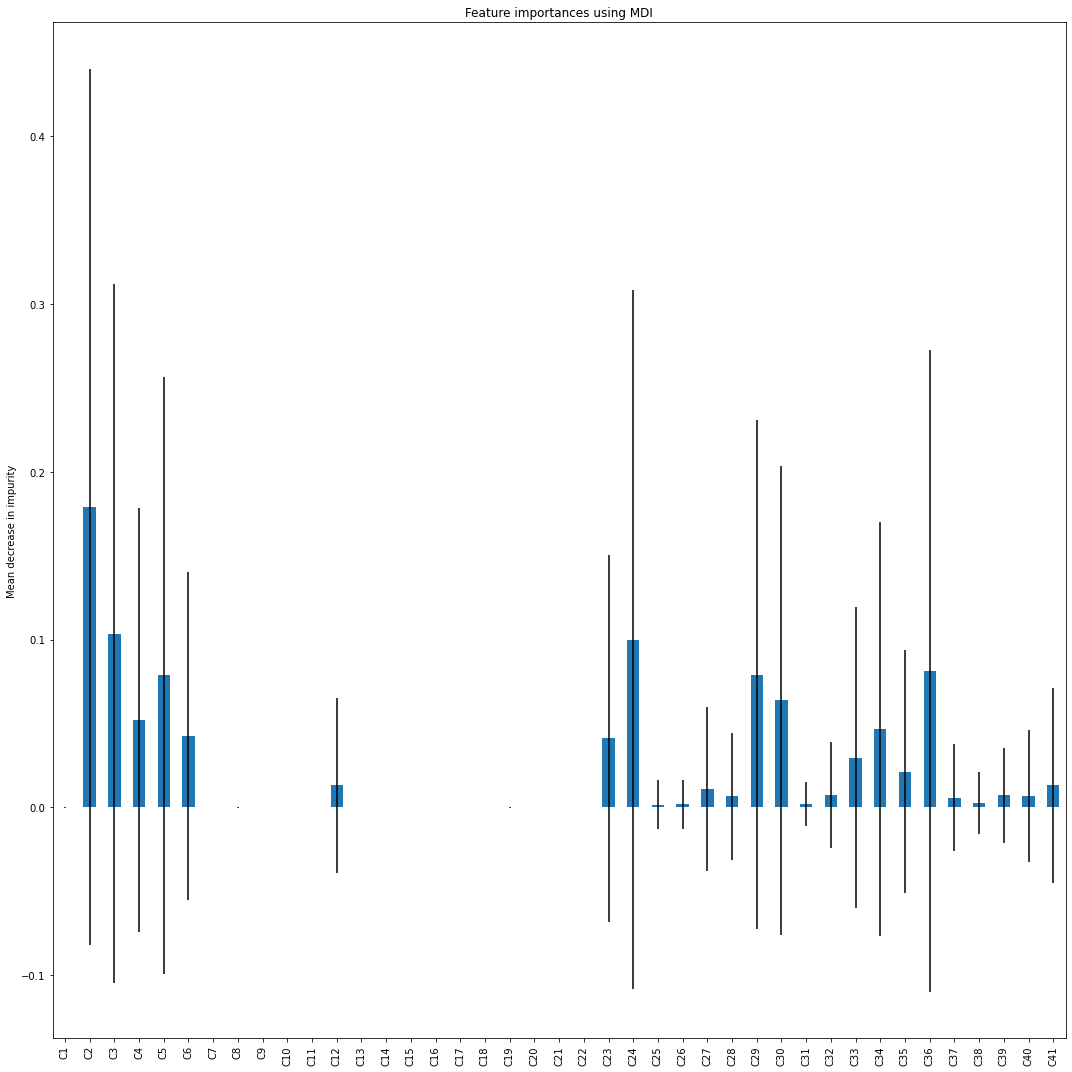

In [192]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(1,1,figsize=(15,15))
#fig = plt.figure(figsize = (15,20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [193]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 59.085 seconds


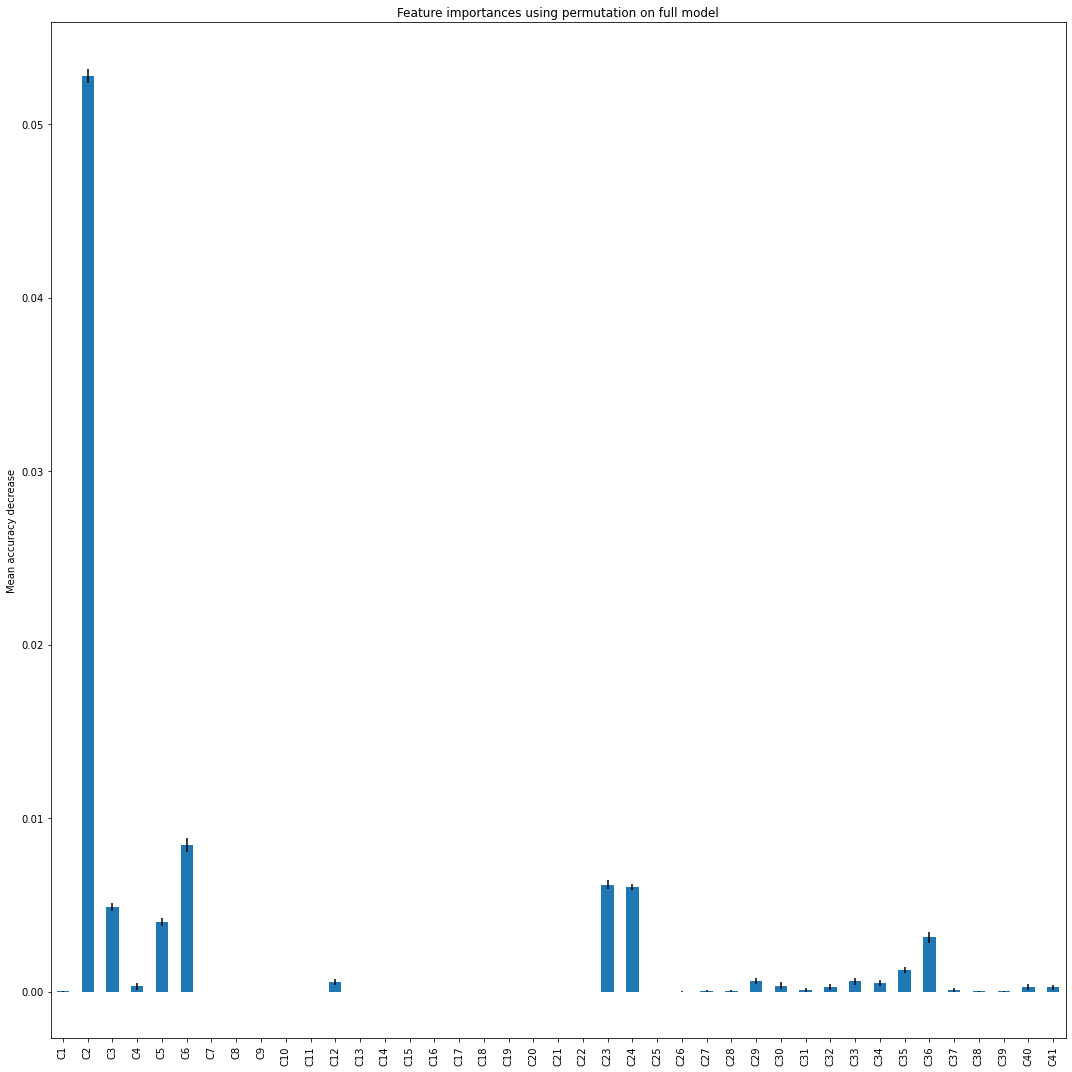

In [195]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
print("training times:")
print("Decision Tree: ",train_time_Dtree)
print("Random Forest: ",train_time_RandomForest)

In [22]:
res=clf.predict(X_test)

In [23]:
sum(res==y_test)/len(y_test)*100

98.03050649037634

In [24]:
precision_score(res,y_test,average='micro')

0.9803050649037633

In [25]:
recall_score(res,y_test,average='micro')

0.9803050649037633

In [26]:
f1_score(res,y_test,average='micro')

0.9803050649037633

In [27]:
confusion_matrix(res, y_test)

array([[11472,     0,     0,     0,     0],
       [    1, 11455,     0,   541,     1],
       [    0,     0, 33015,     0,     0],
       [    0,   601,     0,  1000,     0],
       [    0,     0,     0,     0,     0]], dtype=int64)